In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import re

In [4]:
cfb_realignment = pd.read_csv("../data/FBConference_Realignment.csv")

In [5]:
cfb_realignment.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Pre_Prev Conf,AP High Prev Conf,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,NaN,13.0,13.0,NaN,18.0,22.0,-3.25,1.16,4.41,Group of 5
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.58,-2.22,-0.64,Group of 5
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,NaN,NaN,NaN,NaN,19.0,19.0,0.03,-0.90,-0.93,Independent
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,3.0,2.0,4.0,5.0,4.0,8.0,-0.70,2.02,2.72,Group of 5
4,Boston College,Big East,ACC,2005,16,1,0,1,1,0,...,NaN,17.0,21.0,22.0,2.0,10.0,3.19,7.08,3.89,Power 5


In [6]:
cfb_realignment.info

<bound method DataFrame.info of                     School                      Previous Conference(s)  \
0                Air Force                                         WAC   
1           Arkansas State               Big West/Independent/Big West   
2                     Army                              Conference USA   
3              Boise State                                Big West/WAC   
4           Boston College                                    Big East   
5                      BYU                           WAC/Mountain West   
6               Cincinnati                     Conference USA/Big East   
7                 Colorado                                      Big-12   
8           Colorado State                                         WAC   
9            East Carolina                              Conference USA   
10            Fresno State                                Big West/WAC   
11        Florida Atlantic                                    Sun Belt   
12   F

In [7]:
cfb_realignment.shape

(60, 47)

In [8]:
cfb_realignment.describe()

,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,Unclaimed National Titles,Total National Titles,W_Overall,...,Bowl Games Attended Current Conf,AP Pre_Prev Conf,AP High Prev Conf,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,21.000000,38.000000,30.000000,18.000000,40.000000,31.000000,60.000000,60.000000,60.000000
mean,2009.783333,11.166667,11.083333,0.983333,12.066667,0.600000,0.016667,0.433333,0.616667,137.283333,...,5.783333,11.666667,10.421053,11.600000,13.888889,12.250000,14.741935,0.599500,1.894333,1.294833
std,5.627088,5.678287,9.535468,1.545816,9.563112,1.575232,0.129099,1.406603,1.574066,44.695236,...,3.710232,7.185634,8.012259,7.223525,7.242756,7.142326,6.845766,3.649295,3.657157,2.992479
min,1999.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,-8.830000,-4.040000,-6.070000
25%,2005.000000,8.000000,3.750000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,109.000000,...,3.000000,6.000000,3.000000,5.250000,7.250000,5.000000,9.000000,-1.597500,-1.007500,-0.877500
50%,2012.500000,8.500000,10.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,137.500000,...,6.000000,10.000000,8.000000,11.000000,14.500000,14.500000,15.000000,0.060000,1.585000,1.420000
75%,2013.000000,16.000000,15.250000,1.000000,17.250000,0.000000,0.000000,0.000000,0.000000,169.750000,...,8.000000,17.000000,16.000000,17.500000,21.250000,18.000000,20.000000,3.327500,4.555000,3.282500
max,2020.000000,22.000000,46.000000,6.000000,46.000000,9.000000,1.000000,8.000000,9.000000,247.000000,...,17.000000,24.000000,25.000000,24.000000,24.000000,25.000000,25.000000,8.740000,9.780000,9.020000


In [9]:
cfb_realignment.corr

<bound method DataFrame.corr of                     School                      Previous Conference(s)  \
0                Air Force                                         WAC   
1           Arkansas State               Big West/Independent/Big West   
2                     Army                              Conference USA   
3              Boise State                                Big West/WAC   
4           Boston College                                    Big East   
5                      BYU                           WAC/Mountain West   
6               Cincinnati                     Conference USA/Big East   
7                 Colorado                                      Big-12   
8           Colorado State                                         WAC   
9            East Carolina                              Conference USA   
10            Fresno State                                Big West/WAC   
11        Florida Atlantic                                    Sun Belt   
12   F

In [10]:
print(cfb_realignment.dtypes)

School                                            object
Previous Conference(s)                            object
Current Conference                                object
Year Joined Current Conference                     int64
Years in Current Conference                        int64
Conference Titles in Previous Conference(s)        int64
Conference Titles in Current Conference            int64
Total Conference Titles                            int64
National Titles Before Joining New Conference      int64
National Titles Since Joining New Conference       int64
Unclaimed National Titles                          int64
Total National Titles                              int64
W_Overall                                          int64
L_Overall                                          int64
T_Overall                                          int64
W_Prev_Conf                                        int64
L_Prev_Conference                                  int64
T_Prev_Conference              

Let's add some new columns to the database

Overall Win Percentage

In [11]:
cfb_realignment['Total Games Played'] = cfb_realignment['W_Overall'] + cfb_realignment['L_Overall']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP High Prev Conf,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,13.0,13.0,NaN,18.0,22.0,-3.25,1.16,4.41,Group of 5,293
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,NaN,NaN,NaN,-1.58,-2.22,-0.64,Group of 5,292
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,NaN,NaN,NaN,19.0,19.0,0.03,-0.90,-0.93,Independent,289


In [12]:
cfb_realignment['Overall Win Pct'] = round((cfb_realignment['W_Overall'] / cfb_realignment['Total Games Played']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,13.0,NaN,18.0,22.0,-3.25,1.16,4.41,Group of 5,293,0.587
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,NaN,NaN,-1.58,-2.22,-0.64,Group of 5,292,0.469
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,NaN,NaN,19.0,19.0,0.03,-0.90,-0.93,Independent,289,0.360


In [13]:
top5_ovrwinpct = cfb_realignment.nlargest(5,'Overall Win Pct')
top5_ovrwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,4.0,5.0,4.0,8.0,-0.70,2.02,2.72,Group of 5,305,0.810
40,TCU,WAC/Conference USA/Mountain West,Big-12,2012,9,17,1,18,2,0,...,2.0,2.0,2.0,3.0,-0.23,4.87,5.10,Power 5,299,0.696
56,Virginia Tech,Big East,ACC,2004,17,8,4,12,0,0,...,2.0,7.0,3.0,7.0,4.00,5.42,1.42,Power 5,312,0.686
52,Utah,WAC/Mountain West,Pac-12,2011,10,24,1,25,0,0,...,2.0,14.0,3.0,12.0,0.53,9.55,9.02,Power 5,294,0.673
23,Miami (FL),Big East,ACC,2004,17,9,0,9,5,0,...,1.0,6.0,2.0,11.0,5.22,7.20,1.98,Power 5,301,0.664


In [14]:
bottom5_ovrwinpct = cfb_realignment.nsmallest(5,'Overall Win Pct')
bottom5_ovrwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Post Prev Conf,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,NaN,NaN,NaN,NaN,-2.60,-1.18,1.42,Independent,112,0.179
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,NaN,NaN,NaN,NaN,-1.46,-2.87,-1.41,Independent,278,0.281
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,NaN,NaN,NaN,NaN,2.30,3.22,0.92,Group of 5,282,0.287
43,Texas State,WAC,Sun Belt,2013,8,14,0,14,0,0,...,NaN,NaN,NaN,NaN,-4.19,-0.84,3.35,Group of 5,120,0.300
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,NaN,NaN,NaN,NaN,-0.79,-3.81,-3.02,Group of 5,234,0.303


Previous Conference Win Percentage

In [17]:
cfb_realignment['Total Prev Conference Games'] = cfb_realignment['W_Prev_Conf'] + cfb_realignment['L_Prev_Conference']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Pre Current Conf,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,NaN,18.0,22.0,-3.25,1.16,4.41,Group of 5,293,0.587,13
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,NaN,-1.58,-2.22,-0.64,Group of 5,292,0.469,34
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,NaN,19.0,19.0,0.03,-0.90,-0.93,Independent,289,0.360,80


In [18]:
cfb_realignment['Previous Conference Win Pct'] = round((cfb_realignment['W_Prev_Conf'] / cfb_realignment['Total Prev Conference Games']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,18.0,22.0,-3.25,1.16,4.41,Group of 5,293,0.587,13,0.923
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,NaN,-1.58,-2.22,-0.64,Group of 5,292,0.469,34,0.265
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,19.0,19.0,0.03,-0.90,-0.93,Independent,289,0.360,80,0.162


In [19]:
top5_prevconfwinpct = cfb_realignment.nlargest(5,'Previous Conference Win Pct')
top5_prevconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,18.0,22.0,-3.25,1.16,4.41,Group of 5,293,0.587,13,0.923
23,Miami (FL),Big East,ACC,2004,17,9,0,9,5,0,...,2.0,11.0,5.22,7.20,1.98,Power 5,301,0.664,75,0.853
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,4.0,8.0,-0.70,2.02,2.72,Group of 5,305,0.810,166,0.843
20,Marshall,Mid-American Conference,Conference USA,2005,16,12,1,13,0,0,...,15.0,23.0,-4.49,-0.43,4.06,Group of 5,301,0.611,89,0.775
40,TCU,WAC/Conference USA/Mountain West,Big-12,2012,9,17,1,18,2,0,...,2.0,3.0,-0.23,4.87,5.10,Power 5,299,0.696,174,0.770


In [20]:
bottom5_prevconfwinpct = cfb_realignment.nsmallest(5,'Previous Conference Win Pct')
bottom5_prevconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP High Current Conf,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,NaN,NaN,2.30,3.22,0.92,Group of 5,282,0.287,11,0.000
16,Louisiana,Independent/Big West,Sun Belt,2001,20,6,4,10,0,0,...,15.0,15.0,-3.38,-2.25,1.13,Group of 5,292,0.483,33,0.152
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,19.0,19.0,0.03,-0.90,-0.93,Independent,289,0.360,80,0.162
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,NaN,NaN,-2.60,-1.18,1.42,Independent,112,0.179,48,0.167
29,New Mexico,WAC,Mountain West,1999,22,4,0,4,0,0,...,NaN,NaN,-5.12,3.33,8.45,Group of 5,288,0.375,12,0.250


Current Conference Win Percentage

In [21]:
cfb_realignment['Total Current Conference Games'] = cfb_realignment['W_Current_Conf'] + cfb_realignment['L_Current_Conf']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,AP Post Current Conf,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,22.0,-3.25,1.16,4.41,Group of 5,293,0.587,13,0.923,280
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,NaN,-1.58,-2.22,-0.64,Group of 5,292,0.469,34,0.265,258
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,19.0,0.03,-0.90,-0.93,Independent,289,0.360,80,0.162,209


In [22]:
cfb_realignment['Current Conference Win Pct'] = round((cfb_realignment['W_Current_Conf'] / cfb_realignment['Total Current Conference Games']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,-3.25,1.16,4.41,Group of 5,293,0.587,13,0.923,280,0.571
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,-1.58,-2.22,-0.64,Group of 5,292,0.469,34,0.265,258,0.496
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,0.03,-0.90,-0.93,Independent,289,0.360,80,0.162,209,0.435


In [23]:
top5_currentconfwinpct = cfb_realignment.nlargest(5,'Current Conference Win Pct')
top5_currentconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,-0.70,2.02,2.72,Group of 5,305,0.810,166,0.843,139,0.770
48,UCF,Mid-American Conference/Conference USA,AAC,2013,8,2,4,6,0,0,...,-1.24,-0.68,0.56,Group of 5,296,0.584,183,0.525,113,0.681
6,Cincinnati,Conference USA/Big East,AAC,2013,8,13,3,16,0,0,...,3.29,2.51,-0.78,Group of 5,300,0.613,186,0.575,114,0.675
42,Texas A&M,Big-12,SEC,2012,9,18,0,18,3,0,...,8.74,7.15,-1.59,Power 5,300,0.610,174,0.563,126,0.675
56,Virginia Tech,Big East,ACC,2004,17,8,4,12,0,0,...,4.00,5.42,1.42,Power 5,312,0.686,75,0.760,237,0.662


In [24]:
bottom5_currentconfwinpct = cfb_realignment.nsmallest(5,'Current Conference Win Pct')
bottom5_currentconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Highest SOS Prev Conf,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct
49,UCONN,Independent/Big East,Independent,2020,1,25,0,25,0,0,...,3.48,-2.59,-6.07,Independent,254,0.398,242,0.413,12,0.083
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,-2.60,-1.18,1.42,Independent,112,0.179,48,0.167,64,0.188
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,-1.46,-2.87,-1.41,Independent,278,0.281,240,0.292,38,0.211
43,Texas State,WAC,Sun Belt,2013,8,14,0,14,0,0,...,-4.19,-0.84,3.35,Group of 5,120,0.300,12,0.333,108,0.296
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,2.30,3.22,0.92,Group of 5,282,0.287,11,0.000,271,0.299


Overall Conference Win Percentage

In [25]:
cfb_realignment['Total Conference Wins'] = cfb_realignment['W_Prev_Conf'] + cfb_realignment['W_Current_Conf']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Highest SOS Current Conf,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,1.16,4.41,Group of 5,293,0.587,13,0.923,280,0.571,172
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,-2.22,-0.64,Group of 5,292,0.469,34,0.265,258,0.496,137
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,-0.90,-0.93,Independent,289,0.360,80,0.162,209,0.435,104


In [26]:
cfb_realignment['Total Conference Losses'] = cfb_realignment['L_Prev_Conference'] + cfb_realignment['L_Current_Conf']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Difference in SOS,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,4.41,Group of 5,293,0.587,13,0.923,280,0.571,172,121
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,-0.64,Group of 5,292,0.469,34,0.265,258,0.496,137,155
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,-0.93,Independent,289,0.360,80,0.162,209,0.435,104,185


In [27]:
cfb_realignment['Total Conference Games Played'] = cfb_realignment['W_Prev_Conf'] + cfb_realignment['W_Current_Conf'] + cfb_realignment['L_Prev_Conference'] + cfb_realignment['L_Current_Conf']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Group,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,Group of 5,293,0.587,13,0.923,280,0.571,172,121,293
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,Group of 5,292,0.469,34,0.265,258,0.496,137,155,292
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,Independent,289,0.360,80,0.162,209,0.435,104,185,289


In [28]:
cfb_realignment['Overall Conference Win Pct'] = round((cfb_realignment['Total Conference Wins'] / cfb_realignment['Total Conference Games Played']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,293,0.587,13,0.923,280,0.571,172,121,293,0.587
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,292,0.469,34,0.265,258,0.496,137,155,292,0.469
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,289,0.360,80,0.162,209,0.435,104,185,289,0.360


In [29]:
top5_ovrconfwinpct = cfb_realignment.nlargest(5,'Overall Conference Win Pct')
top5_ovrconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,305,0.810,166,0.843,139,0.770,247,58,305,0.810
40,TCU,WAC/Conference USA/Mountain West,Big-12,2012,9,17,1,18,2,0,...,299,0.696,174,0.770,125,0.592,208,91,299,0.696
56,Virginia Tech,Big East,ACC,2004,17,8,4,12,0,0,...,312,0.686,75,0.760,237,0.662,214,98,312,0.686
52,Utah,WAC/Mountain West,Pac-12,2011,10,24,1,25,0,0,...,294,0.673,158,0.709,136,0.632,198,96,294,0.673
23,Miami (FL),Big East,ACC,2004,17,9,0,9,5,0,...,301,0.664,75,0.853,226,0.602,200,101,301,0.664


In [30]:
bottom5_ovrconfwinpct = cfb_realignment.nsmallest(5,'Overall Conference Win Pct')
bottom5_ovrconfwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Games Played,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,112,0.179,48,0.167,64,0.188,20,92,112,0.179
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,278,0.281,240,0.292,38,0.211,78,200,278,0.281
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,282,0.287,11,0.000,271,0.299,81,201,282,0.287
43,Texas State,WAC,Sun Belt,2013,8,14,0,14,0,0,...,120,0.300,12,0.333,108,0.296,36,84,120,0.300
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,234,0.303,186,0.285,48,0.375,71,163,234,0.303


Bowl Game Win Percentage

In [31]:
cfb_realignment['Previous Conference BG Win Pct'] = round((cfb_realignment['W_Bowl_Prev_Conf'] / cfb_realignment['Bowl Games Attended Prev Conf']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,0.587,13,0.923,280,0.571,172,121,293,0.587,1.0
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,0.469,34,0.265,258,0.496,137,155,292,0.469,NaN
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,0.360,80,0.162,209,0.435,104,185,289,0.360,NaN


In [36]:
top5_prevbgwinpct = cfb_realignment.nlargest(5,'Previous Conference BG Win Pct')
top5_prevbgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,0.587,13,0.923,280,0.571,172,121,293,0.587,1.0
11,Florida Atlantic,Sun Belt,Conference USA,2013,8,1,2,3,0,0,...,0.440,109,0.404,109,0.477,96,122,218,0.440,1.0
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,0.303,186,0.285,48,0.375,71,163,234,0.303,1.0
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,0.281,240,0.292,38,0.211,78,200,278,0.281,1.0
36,San Jose State,Big West/WAC,Mountain West,2013,8,16,1,17,0,0,...,0.382,179,0.391,106,0.368,109,176,285,0.382,1.0


In [37]:
bottom5_prevbgwinpct = cfb_realignment.nsmallest(5,'Overall Conference Win Pct')
bottom5_prevbgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Overall Win Pct,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,0.179,48,0.167,64,0.188,20,92,112,0.179,NaN
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,0.281,240,0.292,38,0.211,78,200,278,0.281,1.0
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,0.287,11,0.000,271,0.299,81,201,282,0.287,NaN
43,Texas State,WAC,Sun Belt,2013,8,14,0,14,0,0,...,0.300,12,0.333,108,0.296,36,84,120,0.300,NaN
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,0.303,186,0.285,48,0.375,71,163,234,0.303,1.0


In [38]:
cfb_realignment['Current Conference BG Win Pct'] = round((cfb_realignment['W_Bowl_Current_Conf'] / cfb_realignment['Bowl Games Attended Current Conf']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,13,0.923,280,0.571,172,121,293,0.587,1.0,0.538
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,34,0.265,258,0.496,137,155,292,0.469,NaN,0.400
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,80,0.162,209,0.435,104,185,289,0.360,NaN,0.833


In [39]:
top5_currentbgwinpct = cfb_realignment.nlargest(5,'Current Conference BG Win Pct')
top5_currentbgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,186,0.285,48,0.375,71,163,234,0.303,1.000,1.000
39,Syracuse,Big East,ACC,2013,8,5,0,5,1,0,...,181,0.453,109,0.394,125,165,290,0.431,0.800,1.000
18,Louisiana Tech,Independent/WAC,Conference USA,2013,8,25,0,25,0,0,...,35,0.486,260,0.519,152,143,295,0.515,0.333,0.857
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,80,0.162,209,0.435,104,185,289,0.360,NaN,0.833
16,Louisiana,Independent/Big West,Sun Belt,2001,20,6,4,10,0,0,...,33,0.152,259,0.525,141,151,292,0.483,NaN,0.778


In [40]:
bottom5_currentbgwinpct = cfb_realignment.nsmallest(5,'Current Conference BG Win Pct')
bottom5_currentbgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Prev Conference Games,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct
7,Colorado,Big-12,Pac-12,2011,10,26,0,26,1,0,...,161,0.484,130,0.362,125,166,291,0.430,0.429,0.0
9,East Carolina,Conference USA,AAC,2014,7,7,0,7,0,0,...,198,0.520,94,0.383,139,153,292,0.476,0.300,0.0
17,Louisiana-Monroe,Independent,Sun Belt,2001,20,4,1,5,0,0,...,33,0.333,249,0.353,99,183,282,0.351,NaN,0.0
37,SMU,WAC/Conference USA,AAC,2013,8,11,0,11,3,0,...,180,0.361,108,0.463,115,173,288,0.399,0.750,0.0
54,UTEP,WAC,Conference USA,2005,16,2,0,2,0,0,...,83,0.361,203,0.345,100,186,286,0.350,0.000,0.0


In [41]:
cfb_realignment['Total Bowl Game Wins'] = cfb_realignment['W_Bowl_Prev_Conf'] + cfb_realignment['W_Bowl_Current_Conf']
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Previous Conference Win Pct,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,0.923,280,0.571,172,121,293,0.587,1.0,0.538,8
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,0.265,258,0.496,137,155,292,0.469,NaN,0.400,4
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,0.162,209,0.435,104,185,289,0.360,NaN,0.833,5


In [42]:
cfb_realignment['Bowl Game Win Pct'] = round((cfb_realignment['W_Bowl_Current_Conf'] / cfb_realignment['Bowl Games Total']),3)
cfb_realignment.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,280,0.571,172,121,293,0.587,1.0,0.538,8,0.500
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,258,0.496,137,155,292,0.469,NaN,0.400,4,0.400
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,209,0.435,104,185,289,0.360,NaN,0.833,5,0.833


In [44]:
top5_bgwinpct = cfb_realignment.nlargest(5,'Bowl Game Win Pct')
top5_bgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,209,0.435,104,185,289,0.360,NaN,0.833,5,0.833
16,Louisiana,Independent/Big West,Sun Belt,2001,20,6,4,10,0,0,...,259,0.525,141,151,292,0.483,NaN,0.778,7,0.778
59,Wyoming,WAC,Mountain West,1999,22,14,0,14,0,0,...,273,0.418,122,162,284,0.430,NaN,0.714,5,0.714
44,Troy,Independent,Sun Belt,2004,17,15,6,21,0,0,...,221,0.538,136,120,256,0.531,NaN,0.625,5,0.625
57,Western Kentucky,Sun Belt,Conference USA,2014,7,11,2,13,0,0,...,105,0.600,87,79,166,0.524,0.0,0.714,5,0.625


In [46]:
bottom5_bgwinpct = cfb_realignment.nsmallest(5,'Bowl Game Win Pct')
bottom5_bgwinpct.head()

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
7,Colorado,Big-12,Pac-12,2011,10,26,0,26,1,0,...,130,0.362,125,166,291,0.430,0.429,0.0,3,0.0
9,East Carolina,Conference USA,AAC,2014,7,7,0,7,0,0,...,94,0.383,139,153,292,0.476,0.300,0.0,3,0.0
17,Louisiana-Monroe,Independent,Sun Belt,2001,20,4,1,5,0,0,...,249,0.353,99,183,282,0.351,NaN,0.0,0,0.0
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,38,0.211,78,200,278,0.281,1.000,NaN,1,0.0
37,SMU,WAC/Conference USA,AAC,2013,8,11,0,11,3,0,...,108,0.463,115,173,288,0.399,0.750,0.0,3,0.0


What group are these teams associated with?

In [47]:
cfb_realignment.Group.value_counts()

Group of 5     40
Power 5        15
Independent     5
Name: Group, dtype: int64

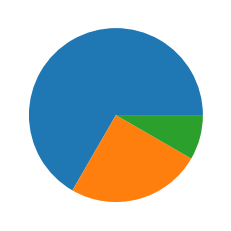

In [48]:
plt.pie(cfb_realignment.Group.value_counts())
plt.show()

In [49]:
Group = pd.DataFrame(cfb_realignment.Group.value_counts().reset_index())
Group.head()

,index,Group
0,Group of 5,40
1,Power 5,15
2,Independent,5


In [50]:
Group.columns = ['Group', 'Teams']
Group.head()

,Group,Teams
0,Group of 5,40
1,Power 5,15
2,Independent,5


In [51]:
Group['Percent'] = round((Group['Teams'] / 60) * 100,1)
Group.head()

,Group,Teams,Percent
0,Group of 5,40,66.7
1,Power 5,15,25.0
2,Independent,5,8.3


Let's look at some general stats

In [52]:
cfb_realignment.W_Overall.sum()

8237

In [53]:
cfb_realignment.W_Overall.mean()

137.28333333333333

In [54]:
cfb_realignment.W_Overall.min()

20

In [55]:
cfb_realignment.W_Overall.max()

247

In [56]:
cfb_realignment.L_Overall.sum()

8366

In [57]:
cfb_realignment.L_Overall.mean()

139.43333333333334

In [58]:
cfb_realignment.L_Overall.min()

58

In [59]:
cfb_realignment.L_Overall.max()

201

In [60]:
8237/8366

0.9845804446569448

Teams that have switched conferences since the BCS era have a total win percentage of .985 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 137 total wins since the start of the BCS Era 1998.

In [61]:
cfb_realignment.W_Prev_Conf.sum()

3805

In [62]:
cfb_realignment.W_Prev_Conf.mean()

63.416666666666664

In [63]:
cfb_realignment.W_Prev_Conf.min()

0

In [64]:
cfb_realignment.W_Prev_Conf.max()

140

In [65]:
cfb_realignment.L_Prev_Conference.sum()

3771

In [66]:
cfb_realignment.L_Prev_Conference.mean()

62.85

In [67]:
cfb_realignment.L_Prev_Conference.min()

1

In [68]:
cfb_realignment.L_Prev_Conference.max()

170

In [69]:
3805/3771

1.0090161760806151

Teams that have switched conferences since the BCS era have a toal win percentage in their previous conference(s) of 1.009 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 63 total wins in their previous conference(s).

In [70]:
cfb_realignment.W_Current_Conf.sum()

4432

In [71]:
cfb_realignment.W_Current_Conf.mean()

73.86666666666666

In [72]:
cfb_realignment.W_Current_Conf.min()

1

In [73]:
cfb_realignment.W_Current_Conf.max()

160

In [74]:
cfb_realignment.L_Current_Conf.sum()

4595

In [75]:
cfb_realignment.L_Current_Conf.mean()

76.58333333333333

In [76]:
cfb_realignment.L_Current_Conf.min()

11

In [77]:
cfb_realignment.L_Current_Conf.max()

190

In [78]:
4432/4595

0.9645266594124048

Teams that have switched conferences since the BCS era have a toal win percentage in their current conference(s) of .965 (Rounded to the Nearest Thousand). Teams have switched conferences have an average of 74 total wins in their current conference.

What year did most of the realignment take place?

In [79]:
year_joined = pd.DataFrame(cfb_realignment['Year Joined Current Conference'].value_counts().reset_index())
year_joined

,index,Year Joined Current Conference
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5
5,2011,5
6,2001,3
7,2004,3
8,2015,1
9,2018,1


In [80]:
year_joined.columns = ['Year', 'Teams That Switched Conferences']
year_joined

,Year,Teams That Switched Conferences
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5
5,2011,5
6,2001,3
7,2004,3
8,2015,1
9,2018,1


2013 had the most teams switch conferences since the BCS Era. Now let's graph the top 5 years.

In [81]:
top5_years = year_joined.nlargest(5,'Teams That Switched Conferences')
top5_years.head()

,Year,Teams That Switched Conferences
0,2013,18
1,2014,8
2,1999,7
3,2012,7
4,2005,5


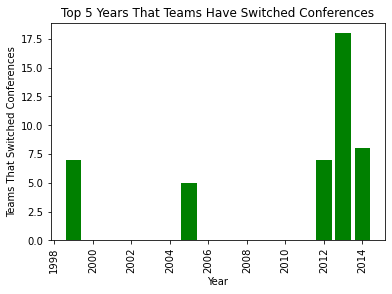

In [82]:
plt.bar(top5_years.Year,top5_years['Teams That Switched Conferences'], color='green')
plt.title('Top 5 Years That Teams Have Switched Conferences')
plt.xlabel('Year')
plt.ylabel('Teams That Switched Conferences')
plt.xticks(rotation = 90)
plt.show()

Which conference gained the most members?

In [83]:
current_conf = pd.DataFrame(cfb_realignment['Current Conference'].value_counts().reset_index())
current_conf

,index,Current Conference
0,Mountain West,12
1,AAC,11
2,Conference USA,11
3,Sun Belt,6
4,ACC,6
5,Independent,5
6,Big Ten,3
7,Pac-12,2
8,SEC,2
9,Big-12,2


In [84]:
current_conf.columns = ['Conference', 'Number of New Members']
current_conf

,Conference,Number of New Members
0,Mountain West,12
1,AAC,11
2,Conference USA,11
3,Sun Belt,6
4,ACC,6
5,Independent,5
6,Big Ten,3
7,Pac-12,2
8,SEC,2
9,Big-12,2


In [85]:
top5_curconf = current_conf.nlargest(5,'Number of New Members')
top5_curconf.head()

,Conference,Number of New Members
0,Mountain West,12
1,AAC,11
2,Conference USA,11
3,Sun Belt,6
4,ACC,6


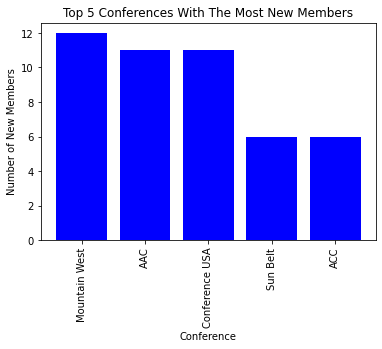

In [86]:
plt.bar(top5_curconf.Conference,top5_curconf['Number of New Members'], color='blue')
plt.title('Top 5 Conferences With The Most New Members')
plt.xlabel('Conference')
plt.ylabel('Number of New Members')
plt.xticks(rotation = 90)
plt.show()

Let's look at Bowl Game Qualifications

In [87]:
cfb_realignment['Bowl Games Total'].nlargest(10)

56    23
23    20
58    20
3     19
5     19
19    19
40    19
42    19
52    18
4     17
Name: Bowl Games Total, dtype: int64

In [88]:
cfb_realignment.sort_values(by='Bowl Games Total', ascending=False)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
56,Virginia Tech,Big East,ACC,2004,17,8,4,12,0,0,...,237,0.662,214,98,312,0.686,0.500,0.412,10,0.304
23,Miami (FL),Big East,ACC,2004,17,9,0,9,5,0,...,226,0.602,200,101,301,0.664,0.833,0.214,8,0.150
58,West Virginia,Big East,Big-12,2012,9,15,0,15,0,0,...,124,0.548,185,113,298,0.621,0.500,0.250,8,0.100
40,TCU,WAC/Conference USA/Mountain West,Big-12,2012,9,17,1,18,2,0,...,125,0.592,208,91,299,0.696,0.692,0.667,13,0.211
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,139,0.770,247,58,305,0.810,0.636,0.625,12,0.263
5,BYU,WAC/Mountain West,Independent,2011,10,23,0,23,1,0,...,142,0.641,196,110,306,0.641,0.444,0.500,9,0.263
42,Texas A&M,Big-12,SEC,2012,9,18,0,18,3,0,...,126,0.675,183,117,300,0.610,0.200,0.667,8,0.316
19,Louisville,Conference USA/Big East,ACC,2014,7,8,0,8,0,0,...,101,0.535,188,113,301,0.625,0.462,0.333,8,0.105
52,Utah,WAC/Mountain West,Pac-12,2011,10,24,1,25,0,0,...,136,0.632,198,96,294,0.673,0.900,0.625,14,0.278
4,Boston College,Big East,ACC,2005,16,1,0,1,1,0,...,215,0.540,169,131,300,0.563,0.833,0.364,9,0.235


Virginia Tech, Miami, West Virginia, TCU, and Bosie State qualified for the most Bowl Games (In descending order).

In [89]:
cfb_realignment.sort_values(by='Bowl Games Total', ascending=True)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
43,Texas State,WAC,Sun Belt,2013,8,14,0,14,0,0,...,108,0.296,36,84,120,0.300,NaN,NaN,0,NaN
50,UMASS,Mid-American Conference,Independent,2016,5,22,0,22,0,0,...,64,0.188,20,92,112,0.179,NaN,NaN,0,NaN
17,Louisiana-Monroe,Independent,Sun Belt,2001,20,4,1,5,0,0,...,249,0.353,99,183,282,0.351,NaN,0.000,0,0.000
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,38,0.211,78,200,278,0.281,1.000,NaN,1,0.000
51,UNLV,WAC,Mountain West,1999,22,1,0,1,0,0,...,271,0.299,81,201,282,0.287,NaN,0.500,1,0.500
15,Idaho,Big West/Sun Belt/WAC/Independent,Sun Belt,2014,4,11,0,11,0,0,...,48,0.375,71,163,234,0.303,1.000,1.000,3,0.333
55,UTSA,WAC,Conference USA,2013,8,0,1,1,0,0,...,110,0.473,60,62,122,0.492,NaN,0.000,0,0.000
12,Florida International,Sun Belt,Conference USA,2013,8,1,0,1,0,0,...,104,0.365,73,138,211,0.346,0.500,0.500,2,0.250
36,San Jose State,Big West/WAC,Mountain West,2013,8,16,1,17,0,0,...,106,0.368,109,176,285,0.382,1.000,0.500,3,0.250
47,UAB,Independent,Conference USA,1999,22,0,2,2,0,0,...,251,0.458,119,143,262,0.454,NaN,0.400,2,0.400


Texas State, UMASS, Louisiana-Monroe, New Mexico State, and UNLV qualified for the least amount of Bowl Games.

In [ ]:
plt.bar(cfb_realignment.School,cfb_realignment['Bowl Games Total'], color='purple')
plt.title('Bowl Games Played By Team')
plt.xlabel('School')
plt.ylabel('Bowl Games Played')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#BGQ = cfb_realignment['Bowl Games Total','W_Bowl_Prev_Conf','L_Bowl_Prev_Conf','Bowl Games Attended Prev Conf','W_Bowl_Current_Conf','L_Bowl_Current_Conf','Bowl Games Attended Current Conf',]
#BGQ.head()

Let's make dataframes for each of the groups

In [90]:
P5 = cfb_realignment[cfb_realignment.Group == 'Power 5']
P5.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
4,Boston College,Big East,ACC,2005,16,1,0,1,1,0,...,215,0.540,169,131,300,0.563,0.833,0.364,9,0.235
7,Colorado,Big-12,Pac-12,2011,10,26,0,26,1,0,...,130,0.362,125,166,291,0.430,0.429,0.000,3,0.000
19,Louisville,Conference USA/Big East,ACC,2014,7,8,0,8,0,0,...,101,0.535,188,113,301,0.625,0.462,0.333,8,0.105


In [91]:
Power_5 = pd.DataFrame(P5)
Power_5.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
4,Boston College,Big East,ACC,2005,16,1,0,1,1,0,...,215,0.540,169,131,300,0.563,0.833,0.364,9,0.235
7,Colorado,Big-12,Pac-12,2011,10,26,0,26,1,0,...,130,0.362,125,166,291,0.430,0.429,0.000,3,0.000
19,Louisville,Conference USA/Big East,ACC,2014,7,8,0,8,0,0,...,101,0.535,188,113,301,0.625,0.462,0.333,8,0.105


In [92]:
G5 = cfb_realignment[cfb_realignment.Group == 'Group of 5']
G5.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,280,0.571,172,121,293,0.587,1.000,0.538,8,0.500
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,258,0.496,137,155,292,0.469,NaN,0.400,4,0.400
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,139,0.770,247,58,305,0.810,0.636,0.625,12,0.263


In [93]:
Group_5 = pd.DataFrame(G5)
Group_5.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
0,Air Force,WAC,Mountain West,1999,22,3,0,3,0,0,...,280,0.571,172,121,293,0.587,1.000,0.538,8,0.500
1,Arkansas State,Big West/Independent/Big West,Sun Belt,2001,20,6,6,12,0,0,...,258,0.496,137,155,292,0.469,NaN,0.400,4,0.400
3,Boise State,Big West/WAC,Mountain West,2011,10,16,4,20,0,0,...,139,0.770,247,58,305,0.810,0.636,0.625,12,0.263


In [94]:
Indy = cfb_realignment[cfb_realignment.Group == 'Independent']
Indy.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,209,0.435,104,185,289,0.360,NaN,0.833,5,0.833
5,BYU,WAC/Mountain West,Independent,2011,10,23,0,23,1,0,...,142,0.641,196,110,306,0.641,0.444,0.500,9,0.263
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,38,0.211,78,200,278,0.281,1.000,NaN,1,0.000


In [95]:
Independent = pd.DataFrame(Indy)
Independent.head(3)

,School,Previous Conference(s),Current Conference,Year Joined Current Conference,Years in Current Conference,Conference Titles in Previous Conference(s),Conference Titles in Current Conference,Total Conference Titles,National Titles Before Joining New Conference,National Titles Since Joining New Conference,...,Total Current Conference Games,Current Conference Win Pct,Total Conference Wins,Total Conference Losses,Total Conference Games Played,Overall Conference Win Pct,Previous Conference BG Win Pct,Current Conference BG Win Pct,Total Bowl Game Wins,Bowl Game Win Pct
2,Army,Conference USA,Independent,2005,16,0,0,0,3,0,...,209,0.435,104,185,289,0.360,NaN,0.833,5,0.833
5,BYU,WAC/Mountain West,Independent,2011,10,23,0,23,1,0,...,142,0.641,196,110,306,0.641,0.444,0.500,9,0.263
30,New Mexico State,Big West/Sun Belt/WAC/Independent/Sun Belt,Independent,2018,3,4,0,4,0,0,...,38,0.211,78,200,278,0.281,1.000,NaN,1,0.000


Let's make an execel workbook for the dataframes we've created

In [ ]:
#xlwriter = pd.ExcelWriter('Conference_RealignmentFB.xlsx') 
#Group.to_excel(xlwriter, sheet_name='Group')
#year_joined.to_excel(xlwriter, sheet_name='Year_Joined_Current_Conference')
#current_conf.to_excel(xlwriter, sheet_name='Current_Conference')
#Power_5.to_excel(xlwriter, sheet_name='Power_5')
#Group_5.to_excel(xlwriter, sheet_name='Group_5')
#Independent.to_excel(xlwriter, sheet_name='Independent')
#xlwriter.close()